[출처](https://www.datamanim.com/dataset/ADPpb/00/26.html)  

# 머신러닝
## 1. 데이터 확인 및 전처리

### (1) EDA 데이터 탐색

#### 1.1 결측치를 확인하고, 결측치 제거할 것

#### 1.2 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것

#### 1.3 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것

**데이터 설명**

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter ‘c’, it indicates a cancellation.

- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

- Description: Product (item) name. Nominal.

- Quantity: The quantities of each product (item) per transaction. Numeric.

- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

- UnitPrice: Unit price. Numeric, Product price per unit in sterling.

- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

- Country: Country name. Nominal, the name of the country where each customer resides.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,563808,22432,WATERING CAN PINK BUNNY,6.0,8/19/2011 11:46,1.95,12626.0,Germany
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,7/28/2011 15:16,1.25,14911.0,EIRE
2,568651,20985,HEART CALCULATOR,12.0,9/28/2011 12:04,1.25,12362.0,Belgium
3,541711,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,24.0,1/21/2011 11:18,1.25,14646.0,Netherlands
4,554134,21154,RED RETROSPOT OVEN GLOVE,10.0,5/23/2011 9:48,1.25,12583.0,France


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35801 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    35801 non-null  object 
 1   StockCode    35801 non-null  object 
 2   Description  35801 non-null  object 
 3   Quantity     35776 non-null  float64
 4   InvoiceDate  35801 non-null  object 
 5   UnitPrice    35704 non-null  float64
 6   CustomerID   35801 non-null  float64
 7   Country      35801 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.2+ MB


In [58]:
df.shape

(35801, 8)

#### 1.1 결측치를 확인하고, 결측치 제거할 것

In [59]:
df.isna().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity       25
InvoiceDate     0
UnitPrice      97
CustomerID      0
Country         0
dtype: int64

In [60]:
df[df.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
23,C571473,21232,STRAWBERRY CERAMIC TRINKET BOX,-3.0,10/17/2011 14:38,NaN,12679.0,France
334,556509,22989,SET 2 PANTRY DESIGN TEA TOWELS,NaN,6/13/2011 10:33,3.25,12708.0,Germany
1099,550821,84987,SET OF 36 TEATIME PAPER DOILIES,1.0,4/21/2011 8:54,NaN,12506.0,France
1213,558113,21914,BLUE HARMONICA IN BOX,12.0,6/27/2011 8:48,NaN,14911.0,EIRE
1270,570657,22966,GINGERBREAD MAN COOKIE CUTTER,12.0,10/11/2011 14:10,NaN,14911.0,EIRE
...,...,...,...,...,...,...,...,...
34370,580736,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2.0,12/6/2011 8:55,NaN,12716.0,France
34595,549953,21556,CERAMIC STRAWBERRY MONEY BOX,6.0,4/13/2011 13:15,NaN,12766.0,Portugal
34734,566739,22628,PICNIC BOXES SET OF 3 RETROSPOT,NaN,9/14/2011 14:30,4.95,12566.0,Germany
34829,537463,21731,RED TOADSTOOL LED NIGHT LIGHT,72.0,12/7/2010 10:08,NaN,12681.0,France


In [61]:
from sklearn.impute import KNNImputer

# 결측치가 있는 수치형 데이터만 추출
KNN_data = df[['Quantity', 'UnitPrice']]

# 모델링
imputer = KNNImputer()
df_filled = imputer.fit_transform(KNN_data)
df_filled = pd.DataFrame(df_filled, columns=KNN_data.columns)
df[KNN_data.columns] = df_filled

# 결측치 확인
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

[해석]
- Quantity, UnitPrice 두 컬럼에 결측치가 존재하였으며 모두 float형태로 확인함.
- 각 컬럼의 결측값이 전체 행 개수에 비해 적은 편이므로 KNN 알고리즘을 통해 결측치가 있는 변수를 대체함.

#### 1.2 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것

In [62]:
box_col = ['Quantity', 'UnitPrice']
melt_df = pd.melt(df[box_col], var_name='variance', value_name='value')
melt_df

,variance,value
0,Quantity,6.00
1,Quantity,12.00
2,Quantity,12.00
3,Quantity,24.00
4,Quantity,10.00
...,...,...
71597,UnitPrice,1.25
71598,UnitPrice,3.25
71599,UnitPrice,2.89
71600,UnitPrice,1.95


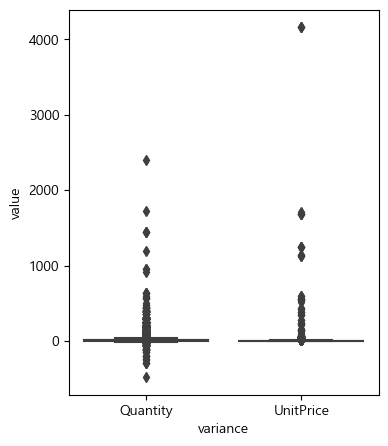

In [63]:
plt.figure(figsize=(4,5))
sns.boxplot(data=melt_df, x='variance', y='value');

In [64]:
# IQR을 이용한 이상치 탐색 함수
def detect_outliers(df=None, column=None, weight=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3-Q1
    IQR_weight = IQR*weight
    
    outlier_idx = df[(df[column] < Q1 - IQR_weight) | (df[column] > Q3+IQR_weight)].index
    
    return outlier_idx

In [65]:
# IQR로 이상치를 찾아 인덱스 저장되어 있음
out_index = detect_outliers(df=df, column='Quantity')
display(df.loc[out_index].sort_values(by='Quantity'))
out_index = detect_outliers(df=df, column='UnitPrice')
display(df.loc[out_index].sort_values(by='UnitPrice', ascending=False))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
618,C564899,M,Manual,-480.0,8/31/2011 11:31,0.22,14646.0,Netherlands
33863,C571499,72802C,VANILLA SCENT CANDLE JEWELLED BOX,-288.0,10/17/2011 15:07,1.25,12454.0,Spain
14848,C562375,22950,36 DOILIES VINTAGE CHRISTMAS,-288.0,8/4/2011 14:46,1.25,14911.0,EIRE
2256,C579090,84598,BOYS ALPHABET IRON ON PATCHES,-288.0,11/28/2011 10:48,0.21,12427.0,Germany
473,C579192,22959,WRAP CHRISTMAS VILLAGE,-250.0,11/28/2011 15:43,0.42,12657.0,France
...,...,...,...,...,...,...,...,...
9405,541570,21212,PACK OF 72 RETROSPOT CAKE CASES,1440.0,1/19/2011 12:34,0.42,14646.0,Netherlands
13341,581175,23084,RABBIT NIGHT LIGHT,1440.0,12/7/2011 15:16,1.79,14646.0,Netherlands
5699,536890,17084R,ASSORTED INCENSE PACK,1440.0,12/3/2010 11:48,0.16,14156.0,EIRE
8219,572052,22595,GINGHAM HEART DECORATION,1728.0,10/20/2011 12:26,0.72,14646.0,Netherlands


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
28503,573077,M,Manual,1.0,10/27/2011 14:13,4161.06,12536.0,France
12353,573080,M,Manual,1.0,10/27/2011 14:20,4161.06,12536.0,France
24047,C573079,M,Manual,-2.0,10/27/2011 14:15,4161.06,12536.0,France
14601,C542348,M,Manual,-1.0,1/27/2011 12:09,1715.85,12539.0,Spain
30542,546329,M,Manual,1.0,3/11/2011 10:22,1687.17,14911.0,EIRE
...,...,...,...,...,...,...,...,...
5495,562374,22192,BLUE DINER WALL CLOCK,12.0,8/4/2011 14:40,7.65,14911.0,EIRE
34709,563076,22626,BLACK KITCHEN SCALES,12.0,8/11/2011 16:12,7.65,14646.0,Netherlands
23295,558262,22193,RED DINER WALL CLOCK,12.0,6/28/2011 8:45,7.65,14646.0,Netherlands
11117,562374,22193,RED DINER WALL CLOCK,12.0,8/4/2011 14:40,7.65,14911.0,EIRE


In [71]:
# Quantity의 이상치를 평균값으로 대체
df.loc[df['Quantity'] < 0, 'Quantity'] = np.mean(df['Quantity'])
df.sort_values(by='Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20834,544996,22487,WHITE WOOD GARDEN PLANT LADDER,1.0,2/25/2011 11:53,9.95,12474.0,Germany
25262,562560,21738,COSY SLIPPER SHOES SMALL RED,1.0,8/5/2011 17:12,2.95,14156.0,EIRE
30572,556509,21843,RED RETROSPOT CAKE STAND,1.0,6/13/2011 10:33,10.95,12708.0,Germany
33075,564975,21034,REX CASH+CARRY JUMBO SHOPPER,1.0,8/31/2011 15:35,0.95,17097.0,Spain
2509,568048,22762,CUPBOARD 3 DRAWER MA CAMPAGNE,1.0,9/23/2011 12:36,14.95,14911.0,EIRE
...,...,...,...,...,...,...,...,...
13341,581175,23084,RABBIT NIGHT LIGHT,1440.0,12/7/2011 15:16,1.79,14646.0,Netherlands
5699,536890,17084R,ASSORTED INCENSE PACK,1440.0,12/3/2010 11:48,0.16,14156.0,EIRE
9405,541570,21212,PACK OF 72 RETROSPOT CAKE CASES,1440.0,1/19/2011 12:34,0.42,14646.0,Netherlands
8219,572052,22595,GINGHAM HEART DECORATION,1728.0,10/20/2011 12:26,0.72,14646.0,Netherlands


[해석]
- 이상치를 제거하는 방법 중 boxplot은 시각적으로 바로 발견할 수 있고, 4분위수를 활용하는 IQR을 활용하여 통계적으로 이상치를 처리할 수 있음.
- CustomerID 컬럼을 제외한 수치형 변수 2개의 이상치를 확인하기 위해 상자그림을 그렸고, 해당 이상치를 제거하기 위해 IQR로 이상치를 찾음.
- Quantity는 수량을 나타내기에 음수값은 나올 수 없어서 분석가의 판단으로 음수값만 평균으로 대체함.
- UnitPrice 컬럼에서 이상치로 나타난 값들이 실제로도 이상치 인지 아닌지는 혼자 판단하기보다 협업에서 논의를 통해 결정해야할 사항으로 판단하여 처리하지 않음.

#### 1.3 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것